# Generating MNIST digits for 0s and 7s

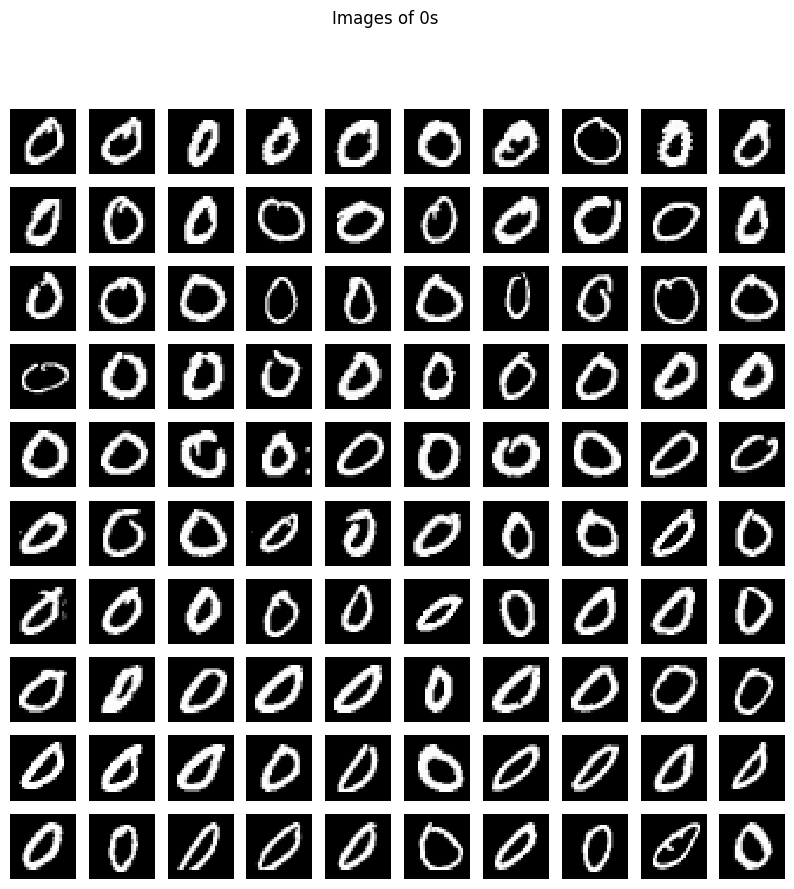

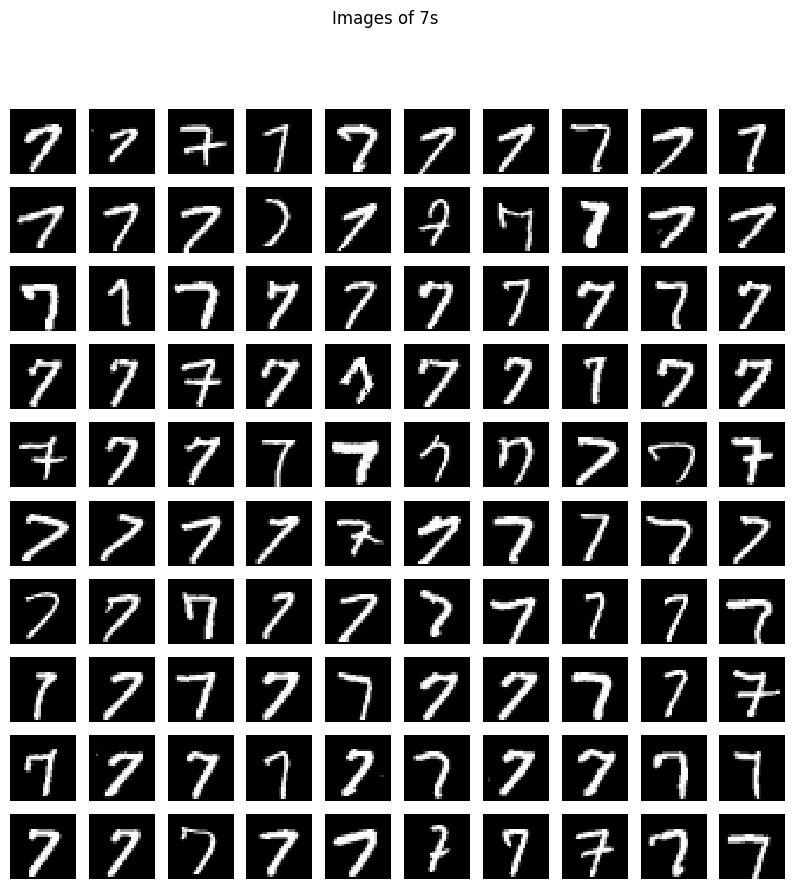

In [36]:
import torch
import torchvision.datasets as datasets
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import os 
import torchvision.utils as vutils
from torchvision.transforms import transforms

BATCH_SIZE = 400

# Load the full MNIST dataset
full_dataset = datasets.MNIST(root='dataset', train=True, transform=transforms.ToTensor(), download=True)

# Filter the dataset to keep only images labeled as 0 or 7
indices = (full_dataset.targets == 0) | (full_dataset.targets == 7)
filtered_indices = indices.nonzero(as_tuple=True)[0]
filtered_dataset = Subset(full_dataset, filtered_indices)

# DataLoader for the filtered dataset
train_loader = DataLoader(filtered_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Separate images of 0s and 7s
images_0 = []
images_7 = []

for images, labels in train_loader:
    for img, label in zip(images, labels):
        if label.item() == 0 and len(images_0) < 200:
            images_0.append(img)
        elif label.item() == 7 and len(images_7) < 200:
            images_7.append(img)
        if len(images_0) >= 200 and len(images_7) >= 200:
            break
    if len(images_0) >= 100 and len(images_7) >= 200:
        break

# Function to plot a grid of images
def plot_grid(images, title):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))
    fig.suptitle(title)
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i][0], cmap='gray', interpolation='none')
        ax.axis('off')
    plt.show()

# Plot 10x10 grids of 0s and 7s
if len(images_0) >= 100:
    plot_grid(images_0, "Images of 0s")
if len(images_7) >= 100:
    plot_grid(images_7, "Images of 7s")
else:
    print(f"Only found {len(images_7)} images of 7s")

In [37]:
# Function to save images
def save_images(images, label, folder_path):
    os.makedirs(folder_path, exist_ok=True)
    for i, img in enumerate(images):
        #img_resized = resize_transform(img)
        filename = os.path.join(folder_path, f"{label}_{i+1}.png")
        vutils.save_image(img, filename)
    print(f"Saved {len(images)} images of {label}s in {folder_path}")

# Save images of 0s and 7s
output_folder = "VAE_qualtrics_digits_0_7"
save_images(images_0, 0, output_folder)
save_images(images_7, 7, output_folder)

Saved 184 images of 0s in VAE_qualtrics_digits_0_7
Saved 200 images of 7s in VAE_qualtrics_digits_0_7
